In [3]:
#Data Collection

In [4]:
import os
import pandas_datareader as pdr

In [16]:
df = pdr.get_data_tiingo('AAPL', api_key=os.getenv('TIINGO_API_KEY'))

C:\Users\daved\AppData\Local\Temp\ipykernel_21088\3710115700.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=os.getenv('TIINGO_API_KEY'))


In [17]:
df.to_csv('AAPL.csv')

In [18]:
import pandas as pd

In [19]:
df = pd.read_csv('AAPL.csv')

In [20]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2020-01-06 00:00:00+00:00,299.80,299.96,292.75,293.79,29644644,72.663987,72.702767,70.955244,71.207314,118578576,0.0,1.0
1,AAPL,2020-01-07 00:00:00+00:00,298.39,300.90,297.48,299.84,27877655,72.322238,72.930599,72.101677,72.673682,111510620,0.0,1.0
2,AAPL,2020-01-08 00:00:00+00:00,303.19,304.44,297.16,297.16,33090946,73.485638,73.788606,72.024117,72.024117,132363784,0.0,1.0
3,AAPL,2020-01-09 00:00:00+00:00,309.63,310.43,306.20,307.24,42621542,75.046532,75.240432,74.215186,74.467256,170486168,0.0,1.0
4,AAPL,2020-01-10 00:00:00+00:00,310.33,312.67,308.25,310.60,35217272,75.216194,75.783351,74.712054,75.281635,140869088,0.0,1.0


In [21]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2024-12-26 00:00:00+00:00,259.02,260.10,257.6300,258.19,27262983,259.02,260.10,257.6300,258.19,27262983,0.0,1.0
1253,AAPL,2024-12-27 00:00:00+00:00,255.59,258.70,253.0600,257.83,42355321,255.59,258.70,253.0600,257.83,42355321,0.0,1.0
1254,AAPL,2024-12-30 00:00:00+00:00,252.20,253.50,250.7500,252.23,35557542,252.20,253.50,250.7500,252.23,35557542,0.0,1.0
1255,AAPL,2024-12-31 00:00:00+00:00,250.42,253.28,249.4300,252.44,39480718,250.42,253.28,249.4300,252.44,39480718,0.0,1.0
1256,AAPL,2025-01-02 00:00:00+00:00,243.85,249.10,241.8201,248.93,55740731,243.85,249.10,241.8201,248.93,55740731,0.0,1.0


In [22]:
df1 = df.reset_index()['close']

In [23]:
df1.shape

(1257,)

In [24]:
df1

0       299.80
1       298.39
2       303.19
3       309.63
4       310.33
         ...  
1252    259.02
1253    255.59
1254    252.20
1255    250.42
1256    243.85
Name: close, Length: 1257, dtype: float64

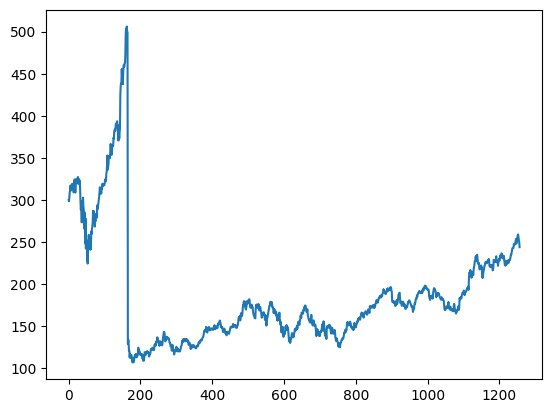

In [25]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [26]:
#LSTM are sensitive to the scale of the data. So we apply MinMax scaler

In [27]:
import numpy as np

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [29]:
df1

array([[0.4833062 ],
       [0.47977458],
       [0.49179712],
       ...,
       [0.36408265],
       [0.3596243 ],
       [0.34316844]])

In [30]:
#splitting dataset into train and split

In [32]:
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [34]:
training_size,test_size

(817, 440)

In [33]:
import numpy
#convert an array of values into a dataset matrix

In [40]:
def create_dataset(dataset,time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]   ###i=0, 0,1,2,3---------99  100
        dataX.append(a)
        dataY.append(dataset[i + time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [41]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4

In [42]:
time_step = 100
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test= create_dataset(test_data,time_step)

In [45]:
print(X_train.shape),print(y_test.shape)

(716, 100)
(339,)


(None, None)

In [44]:
print(X_test.shape) , print(y_test.shape)

(339, 100)
(339,)


(None, None)

In [47]:
#reshape input to be [samples, time steps, features] which is required for LSTM(dimension addition)

In [48]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [52]:
### Creating the Stacked LSTM Model

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [54]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_3 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_4 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 10s 392ms/step - loss: 0.0271 - val_loss: 0.0019
Epoch 2/100
12/12 [==============================] - 3s 286ms/step - loss: 0.0100 - val_loss: 0.0011
Epoch 3/100
12/12 [==============================] - 4s 295ms/step - loss: 0.0083 - val_loss: 5.5457e-04
Epoch 4/100
12/12 [==============================] - 3s 259ms/step - loss: 0.0078 - val_loss: 0.0010
Epoch 5/100
12/12 [==============================] - 3s 271ms/step - loss: 0.0076 - val_loss: 2.6994e-04
Epoch 6/100
12/12 [==============================] - 3s 266ms/step - loss: 0.0062 - val_loss: 7.8361e-04
Epoch 7/100
12/12 [==============================] - 3s 284ms/step - loss: 0.0056 - val_loss: 0.0011
Epoch 8/100
12/12 [==============================] - 3s 246ms/step - loss: 0.0054 - val_loss: 3.0792e-04
Epoch 9/100
12/12 [==============================] - 3s 270ms/step - loss: 0.0042 - val_loss: 5.2736e-04
Epoch 10/100
12/12 [==============================] - 3s 293ms/step - 

In [57]:
import tensorflow as tf

In [58]:
tf.__version__

'2.10.0'

In [59]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 86ms/step


In [60]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [61]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

182.0341569249087

In [63]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

199.05512459416195

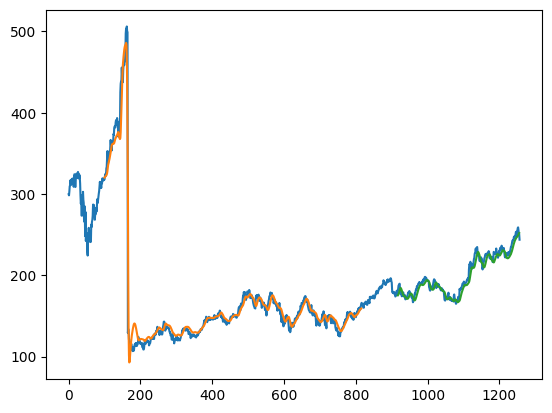

In [64]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [65]:

len(test_data)

440

In [67]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [68]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [69]:
temp_input

[0.27724483406386974,
 0.28661239824671253,
 0.28773951158422034,
 0.29525360050093924,
 0.29858484658735124,
 0.2981840951784595,
 0.29973700688791477,
 0.29946149029430175,
 0.29477770820288035,
 0.30056355666875384,
 0.30141515341264863,
 0.30354414527238566,
 0.29968691296180333,
 0.30795241077019403,
 0.30597370068879143,
 0.290369442705072,
 0.2855604257983719,
 0.2893926111458985,
 0.2854852849092047,
 0.2857107075767063,
 0.283706950532248,
 0.29009392611145896,
 0.290369442705072,
 0.2896931747025672,
 0.27421415153412637,
 0.27539135879774573,
 0.28515967438948026,
 0.30564809016906697,
 0.303969943644333,
 0.2996368190356919,
 0.3018910457107075,
 0.2993863494051346,
 0.30226675015654353,
 0.30294301815904817,
 0.31599248591108325,
 0.29898559799624297,
 0.3004132748904195,
 0.29763306199123346,
 0.30046336881653096,
 0.2876643706950532,
 0.2978835316217909,
 0.3073262366938008,
 0.3060738885410143,
 0.3023418910457107,
 0.3117345021916092,
 0.31812147777082017,
 0.312936756

In [70]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.3596603]
101
1 day input [0.2866124  0.28773951 0.2952536  0.29858485 0.2981841  0.29973701
 0.29946149 0.29477771 0.30056356 0.30141515 0.30354415 0.29968691
 0.30795241 0.3059737  0.29036944 0.28556043 0.28939261 0.28548528
 0.28571071 0.28370695 0.29009393 0.29036944 0.28969317 0.27421415
 0.27539136 0.28515967 0.30564809 0.30396994 0.29963682 0.30189105
 0.29938635 0.30226675 0.30294302 0.31599249 0.2989856  0.30041327
 0.29763306 0.30046337 0.28766437 0.29788353 0.30732624 0.30607389
 0.30234189 0.3117345  0.31812148 0.31293676 0.31386349 0.32100188
 0.32470883 0.32315592 0.31038197 0.30990607 0.31201002 0.31699436
 0.31767063 0.30872887 0.29823419 0.2907201  0.28846587 0.29207264
 0.29024421 0.30216656 0.30086412 0.2940263  0.2940263  0.29625548
 0.30402004 0.29595492 0.3035191  0.30417032 0.3059737  0.30477145
 0.30815279 0.31566688 0.32115216 0.32082655 0.32683782 0.33249843
 0.34016281 0.3410645  0.34113964 0.3406387  0.35043206 0.35298685
 0.34978084 0.35346274 0.35388854 

In [71]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [72]:
import matplotlib.pyplot as plt

In [73]:
len(df1)

1257

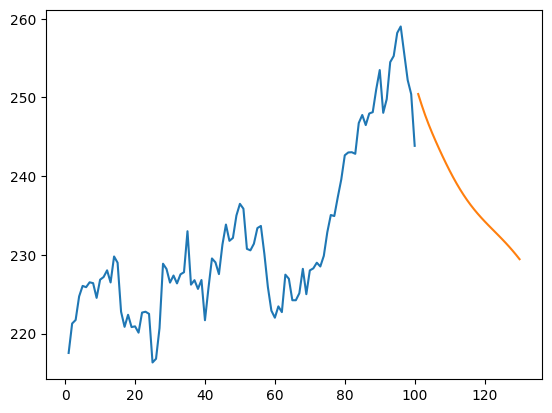

In [74]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

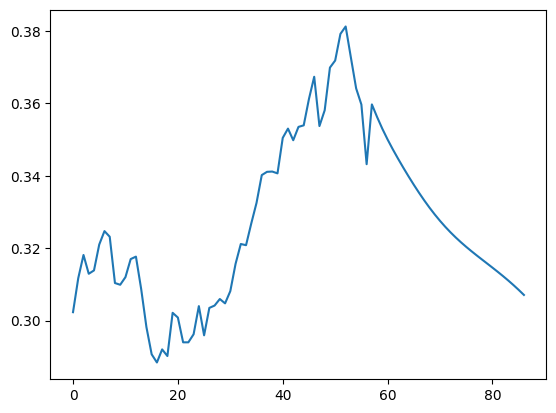

In [75]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [76]:

df3=scaler.inverse_transform(df3).tolist()

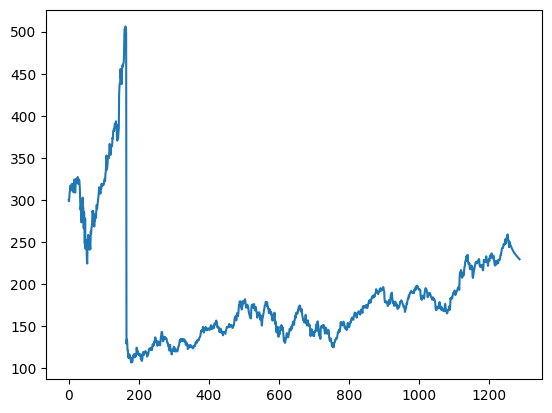

In [77]:
plt.plot(df3)

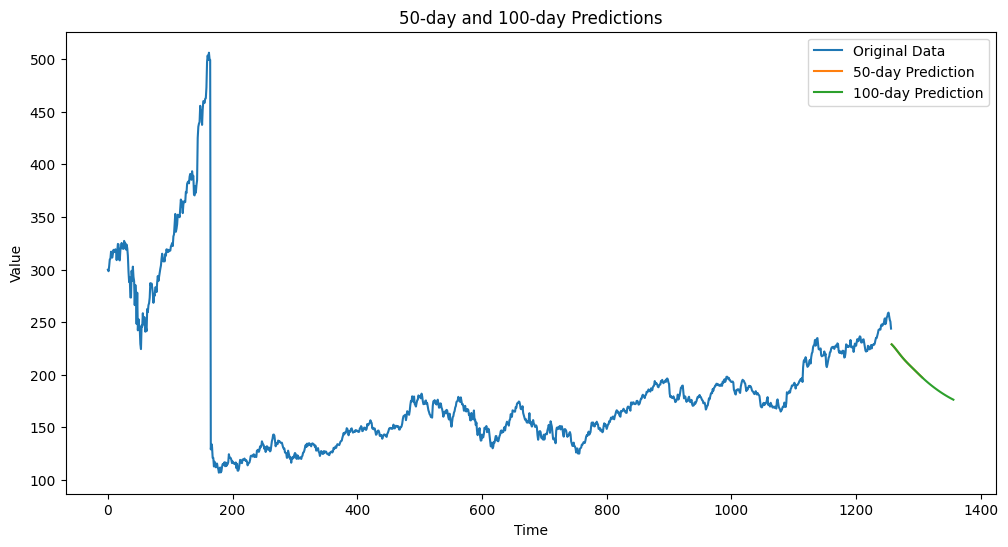

In [78]:
# Adjusting for 50-day prediction
lst_output_50 = []
temp_input_50 = temp_input.copy()  # Use a copy of the original input
i = 0

while i < 50:
    if len(temp_input_50) > n_steps:
        x_input = np.array(temp_input_50[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input_50.extend(yhat[0].tolist())
        temp_input_50 = temp_input_50[1:]
        lst_output_50.extend(yhat.tolist())
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input_50.extend(yhat[0].tolist())
        lst_output_50.extend(yhat.tolist())
    i += 1

# Adjusting for 100-day prediction
lst_output_100 = []
temp_input_100 = temp_input.copy()  # Use another copy of the original input
i = 0

while i < 100:
    if len(temp_input_100) > n_steps:
        x_input = np.array(temp_input_100[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input_100.extend(yhat[0].tolist())
        temp_input_100 = temp_input_100[1:]
        lst_output_100.extend(yhat.tolist())
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input_100.extend(yhat[0].tolist())
        lst_output_100.extend(yhat.tolist())
    i += 1

# Combine original data with predictions for plotting
df3_50 = df1.tolist()
df3_50.extend(lst_output_50)
df3_100 = df1.tolist()
df3_100.extend(lst_output_100)

# Inverse transform for plotting
df3_50 = scaler.inverse_transform(df3_50).tolist()
df3_100 = scaler.inverse_transform(df3_100).tolist()

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(df1), label="Original Data")
plt.plot(range(len(df1), len(df1) + 50), scaler.inverse_transform(lst_output_50), label="50-day Prediction")
plt.plot(range(len(df1), len(df1) + 100), scaler.inverse_transform(lst_output_100), label="100-day Prediction")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("50-day and 100-day Predictions")
plt.show()


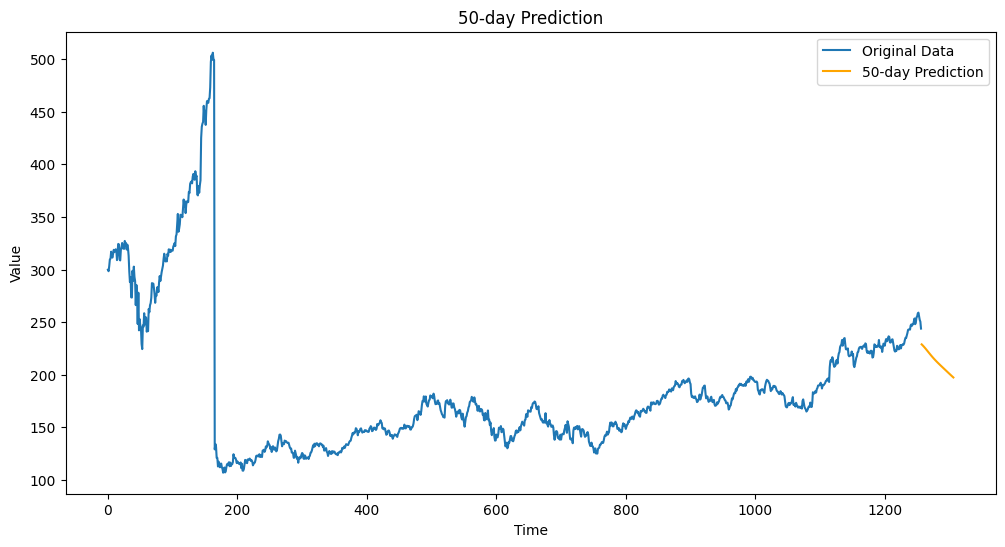

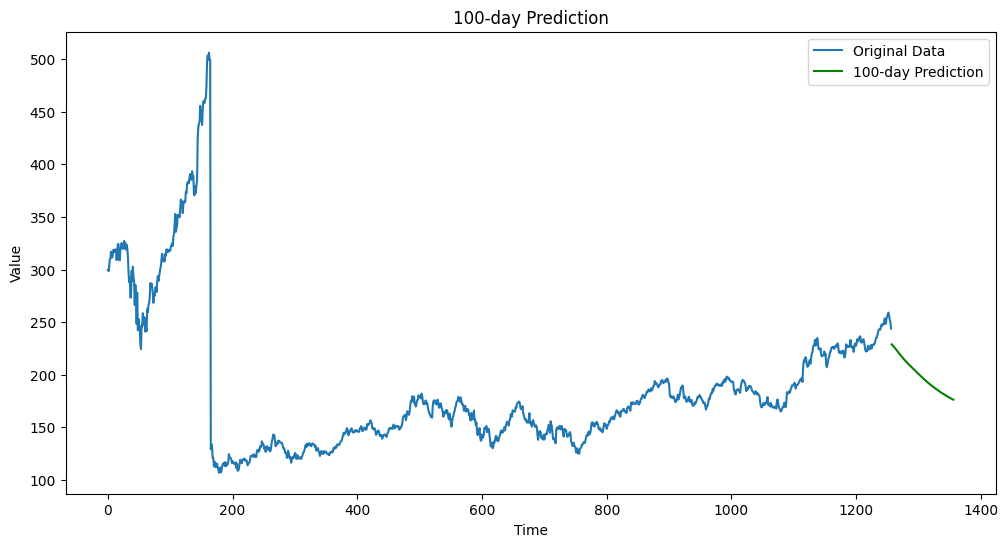

In [79]:
# Predict for 50 days
lst_output_50 = []
temp_input_50 = temp_input.copy()  # Use a copy of the original input
i = 0

while i < 50:
    if len(temp_input_50) > n_steps:
        x_input = np.array(temp_input_50[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input_50.extend(yhat[0].tolist())
        temp_input_50 = temp_input_50[1:]
        lst_output_50.extend(yhat.tolist())
    else:
        x_input = np.array(temp_input_50).reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input_50.extend(yhat[0].tolist())
        lst_output_50.extend(yhat.tolist())
    i += 1

# Predict for 100 days
lst_output_100 = []
temp_input_100 = temp_input.copy()
i = 0

while i < 100:
    if len(temp_input_100) > n_steps:
        x_input = np.array(temp_input_100[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input_100.extend(yhat[0].tolist())
        temp_input_100 = temp_input_100[1:]
        lst_output_100.extend(yhat.tolist())
    else:
        x_input = np.array(temp_input_100).reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input_100.extend(yhat[0].tolist())
        lst_output_100.extend(yhat.tolist())
    i += 1

# Prepare data for plotting
# Combine predictions with original data
df3_50 = df1.tolist() + lst_output_50
df3_100 = df1.tolist() + lst_output_100

# Inverse transform predictions and original data
df3_50 = scaler.inverse_transform(np.array(df3_50).reshape(-1, 1)).tolist()
df3_100 = scaler.inverse_transform(np.array(df3_100).reshape(-1, 1)).tolist()

# Plot for 50-day prediction
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(df1), label="Original Data")  # Original data
plt.plot(range(len(df1), len(df1) + 50), scaler.inverse_transform(np.array(lst_output_50).reshape(-1, 1)), label="50-day Prediction", color='orange')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("50-day Prediction")
plt.show()

# Plot for 100-day prediction
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(df1), label="Original Data")  # Original data
plt.plot(range(len(df1), len(df1) + 100), scaler.inverse_transform(np.array(lst_output_100).reshape(-1, 1)), label="100-day Prediction", color='green')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("100-day Prediction")
plt.show()
